In [2]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, median
from skimage.measure import label, regionprops_table
from skimage.morphology import remove_small_objects, remove_small_holes, erosion
import numpy as np

## Read Image

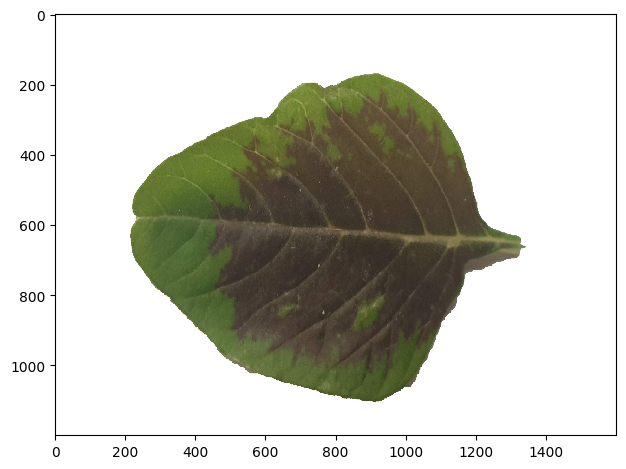

In [3]:
# read image
image = imread("../data/cleaned_dataset/arive_dantu/AV-S-001.jpg")
imshow(image);

## Convert RGB to Grayscale

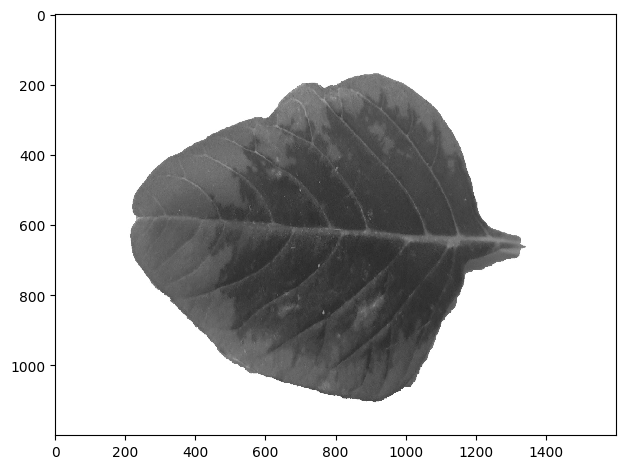

In [4]:
image_gray = rgb2gray(image)
imshow(image_gray, cmap="gray");

### Median Filtering

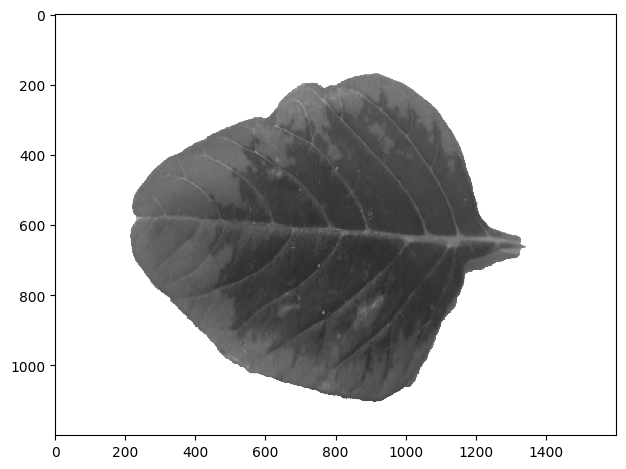

In [5]:
image_median = median(image_gray)
imshow(image_median, cmap="gray")

### Thresholding (Binary Image)

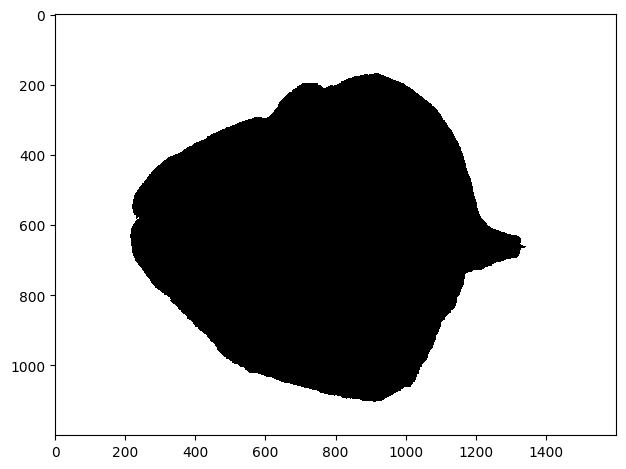

In [6]:
threshold = threshold_otsu(image_gray)
image_binary = image_gray > threshold
imshow(image_binary, cmap="gray");

### Erosion

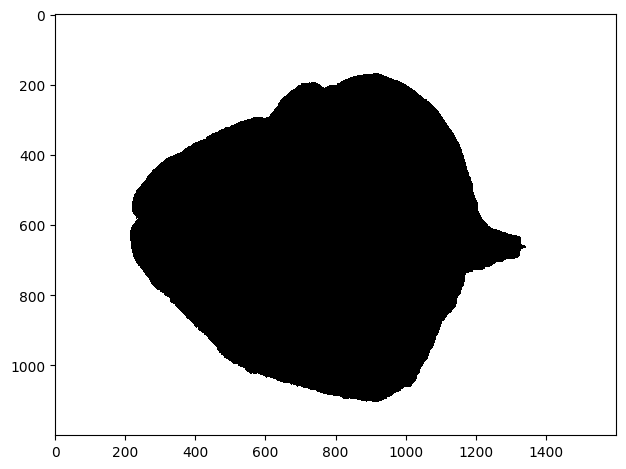

In [7]:
image_erosion = erosion(image_binary)
image_erosion = remove_small_objects(image_erosion, 50)
image_erosion = remove_small_holes(image_erosion, 50)
imshow(image_erosion, cmap="gray")

### Inverse Image

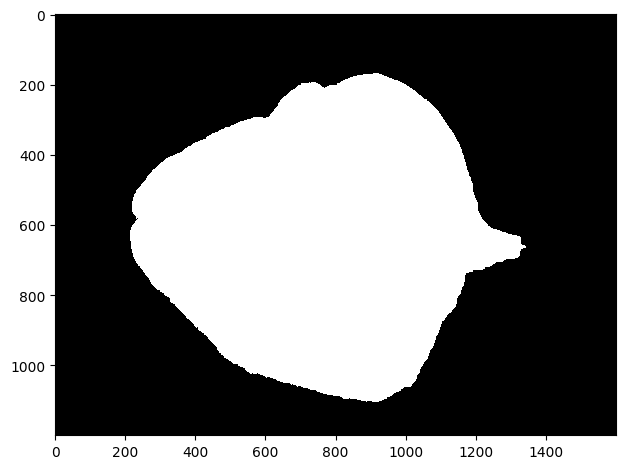

In [8]:
inverted_img = np.invert(image_erosion)
imshow(inverted_img, cmap="gray")

### Feature Extraction

In [21]:
properties = [
    "area",
    "eccentricity",
    "major_axis_length",
    "minor_axis_length",
    "perimeter",
]

labels = label(inverted_img)
props = regionprops_table(labels, inverted_img, properties=properties)
props

{'area': array([677952.]),
 'eccentricity': array([0.47129833]),
 'major_axis_length': array([1001.20280051]),
 'minor_axis_length': array([883.03469571]),
 'perimeter': array([3516.70302783])}

## Test Save CSV

In [14]:
import csv

field_names = [
    "area",
    "eccentricity",
    "major_axis_length",
    "minor_axis_length",
    "perimeter",
]

with open("../data/cleaned_dataset/arive_dantu/AV-S-001.csv", "w") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    writer.writerow(props)

with open("temp.csv", "w", newline="") as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write the header
    csv_writer.writerow(["Property", "Value"])

    # Write the data
    for key, value in data.items():
        csv_writer.writerow([key, value[0]])